# Задание 3.3

In [62]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [3]:
illit = pd.read_csv('illiteracy.txt', sep = '\t', header = 0)

In [5]:
illit.corr()

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


In [8]:
round(illit.corr().iloc[0,1],4)

0.7687

In [17]:
round(illit.corr(method="spearman").iloc[0,1],4)

0.753

In [16]:
illit.corr(method="spearman")

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


# Задание 3.4

In [20]:
water = pd.read_csv('water.txt', sep = '\t', header = 0)

In [21]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [25]:
round(water.corr().iloc[0,1], 4)

-0.6548

In [26]:
round(water.corr(method="spearman").iloc[0,1], 4)

-0.6317

In [42]:
water_south = water[water.location == 'South']
water_north = water[water.location == 'North']
[x, y] = [round(water_south.corr().iloc[0,1], 4), round(water_north.corr().iloc[0,1], 4)]

In [47]:
min([abs(x), abs(y)])

0.3686

In [48]:
import math

In [50]:
def correllation(a, b, c ,d):
    ans = (a*d - c*b)/(math.sqrt((a+b)*(a+c)*(b+d)*(c+d)))
    return ans

In [51]:
correllation(239, 515, 203,718)

0.10900237458678963

In [52]:
from scipy.stats import chi2_contingency

In [55]:
obs = np.array([[239,203], [515, 718]])
chi2_contingency(obs)

(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[198.96597015, 243.03402985],
        [555.03402985, 677.96597015]]))

In [111]:
sample1 = [1] * 239 + [0] * 515
sample2 = [1] * 203  + [0] * 718

In [112]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [113]:
print "confidence interval: [%f, %f]" % proportions_confint_diff_ind(sample1, sample2)

confidence interval: [0.053905, 0.139222]


In [114]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [115]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [117]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(sample1, sample2))

p-value: 0.000008


In [127]:
obs = np.array([[197, 111, 33],
                [382, 685, 331],
                [110, 342, 333]])
round(chi2_contingency(obs)[0], 4)

293.6831

In [129]:
chi2_contingency(obs)

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

In [143]:
math.sqrt(chi2_contingency(obs)[0]/(33 * (3-1)))

2.109441655254463

In [146]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [147]:
cramers_corrected_stat(obs)

0.2412013934500338

In [155]:
math.sqrt((chi2_contingency(obs)[0]/sum(sum(obs)))/2)

0.2412013934500338

In [150]:
sum(sum(obs))

2524

# Задание 3.6

In [170]:
auc = pd.read_csv('AUCs.txt', sep = '\t', header = 0)


In [171]:
auc1 = auc.drop(u'Unnamed: 0', axis =1)

In [191]:
auc1.columns

Index([u'C4.5', u'C4.5+m', u'C4.5+cf', u'C4.5+m+cf'], dtype='object')

In [172]:
from itertools import combinations

In [187]:
ans_list = []
for i in combinations(range(auc1.shape[1]), 2):
    print i
    ans = stats.wilcoxon(auc1.iloc[:,i[0]], auc1.iloc[:,i[1]])[1]
    ans_list.append(ans)
    print ans

(0, 1)
0.01075713311978963
(0, 2)
0.861262330095348
(0, 3)
0.015906444101703374
(1, 2)
0.046332729793395394
(1, 3)
0.3278256758446406
(2, 3)
0.022909099354356588


In [195]:
min(ans_list)

0.01075713311978963

In [197]:
from statsmodels.sandbox.stats.multicomp import multipletests 
reject, p_corrected, a1, a2 = multipletests(np.array(ans_list), 
                                            alpha = 0.05, 
                                            method = 'holm') 

In [201]:
reject, p_corrected, a1, a2 = multipletests(np.array(ans_list), 
                                            alpha = 0.05, 
                                            method = 'fdr_bh') 

In [203]:
print p_corrected, reject

[0.0458182  0.86126233 0.0458182  0.06949909 0.39339081 0.0458182 ] [ True False  True False False  True]


# Задание 3.5

In [204]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [205]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [207]:
raw = pd.read_csv("botswana.tsv", sep="\t", index_col=False) 
raw.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [246]:
raw.isnull().any(axis=1).value_counts()

True     2527
False    1834
dtype: int64

In [280]:
data = raw

In [281]:
data['nevermarr'] = data['agefm'].apply(lambda x : 1 if math.isnan(float(x)) == True else 0)

In [283]:
data = data.drop('evermarr', axis =1)

In [285]:
data['agefm'] = data['agefm'].apply(lambda x : 0 if math.isnan(float(x)) == True else x)

In [286]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [301]:
count = -1
for i in data.loc[:,'heduc']:
    count+=1 
    if data['nevermarr'][count] == 1:
        data.loc[count,'heduc'] = -1

In [313]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0


In [308]:
data.heduc.isnull().value_counts()

False    4238
True      123
Name: heduc, dtype: int64

In [314]:
data.idlnchld.isnull().value_counts()

False    4361
Name: idlnchld, dtype: int64

In [310]:
data['idlnchld_noans'] = data['idlnchld'].apply(lambda x : 1 if math.isnan(float(x)) == True else 0)

In [312]:
data['idlnchld'] = data['idlnchld'].apply(lambda x : -1 if math.isnan(float(x)) == True else x)

In [319]:
data.heduc.isnull().value_counts()

False    4238
True      123
Name: heduc, dtype: int64

In [316]:
data['heduc_noans'] = data['heduc'].apply(lambda x : 1 if math.isnan(float(x)) == True else 0)

In [320]:
data['heduc'] = data['heduc'].apply(lambda x : -2 if math.isnan(float(x)) == True else x)

In [323]:
data.heduc_noans.value_counts()

0    4238
1     123
Name: heduc_noans, dtype: int64

In [324]:
data['usemeth_noans'] = data['usemeth'].apply(lambda x : 1 if math.isnan(float(x)) == True else 0)

In [325]:
data['usemeth'] = data['usemeth'].apply(lambda x : -1 if math.isnan(float(x)) == True else x)

In [328]:
data.usemeth_noans.value_counts()

0    4290
1      71
Name: usemeth_noans, dtype: int64

In [483]:
data1 = data

In [485]:
data1 = data1.dropna(subset=['knowmeth', 'electric', 'radio', 'tv', 'bicycle'])

In [488]:
print data1.shape[0] * data1.shape[1]

78264


In [490]:
data1.columns

Index([u'ceb', u'age', u'educ', u'religion', u'idlnchld', u'knowmeth',
       u'usemeth', u'agefm', u'heduc', u'urban', u'electric', u'radio', u'tv',
       u'bicycle', u'nevermarr', u'idlnchld_noans', u'heduc_noans',
       u'usemeth_noans'],
      dtype='object')

In [511]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv  + bicycle + nevermarr+ idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data1)
fitted = m1.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:22:01   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [508]:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

Breusch-Pagan test: p=0.000000


/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


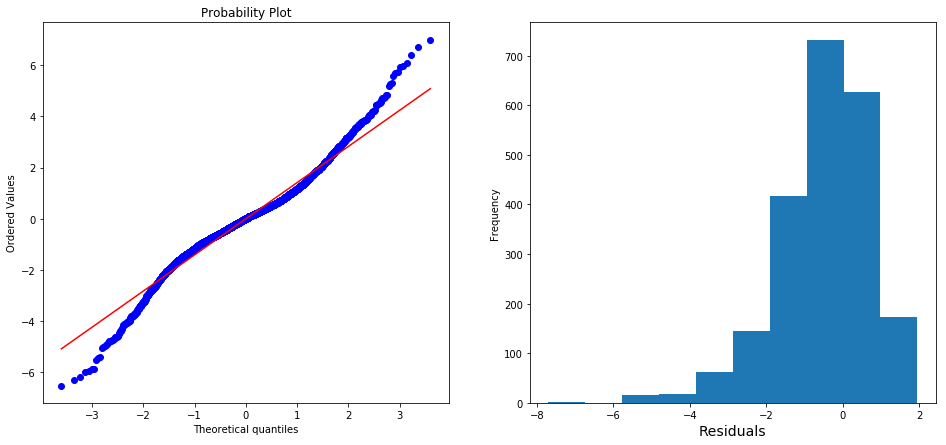

In [498]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [513]:
data2 = data1.drop(columns=['religion', 'radio', 'tv'])

In [514]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + bicycle + nevermarr+ idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data2)
fitted = m2.fit()
print fitted.summary()
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:24:26   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """


In [515]:
print "F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m2.fit())

F=0.919236, p=0.467231, k1=5.000000


In [516]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban + electric + bicycle + nevermarr+ idlnchld_noans + heduc_noans ', 
             data=data2)
fitted = m2.fit()
print fitted.summary()
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]



                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:38:21   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """


In [518]:
print m2.fit().compare_f_test(m3.fit())

(92.89058230109622, 3.1552009480426394e-40, 2.0)


In [519]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + bicycle + nevermarr+ idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data2)
fitted = m2.fit(cov_type='HC1')
print fitted.summary()
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]



                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:41:20   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """
